<a href="https://colab.research.google.com/github/PlatonSidelnikov/DZ2/blob/main/%D0%94%D0%97_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!wget https://raw.githubusercontent.com/PlatonSidelnikov/Dz-6/main/train.csv

--2022-05-09 07:32:25--  https://raw.githubusercontent.com/PlatonSidelnikov/Dz-6/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 987712 (965K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 964.56K  --.-KB/s    in 0.05s   

2022-05-09 07:32:25 (19.9 MB/s) - ‘train.csv’ saved [987712/987712]



In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#from sklearn.model_selection import train_test_split

#train, test = train_test_split(data, test_size=0.3, random_state=42)

# применим разбиение на тренировочную и тестовую выборки уже после всех преобразований дата фрейма

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [ ]:
print('Number of NaNs:\n')
print(data.isnull().sum(axis=0))

Number of NaNs:

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [ ]:
no_nan_data = data.fillna('')
print('Number of NaNs:\n')
print(no_nan_data.isnull().sum(axis=0))

Number of NaNs:

id          0
keyword     0
location    0
text        0
target      0
dtype: int64


In [ ]:
# применим разбиение на новом датасете без нанов
from sklearn.model_selection import train_test_split

train, test = train_test_split(no_nan_data, test_size=0.3, random_state=42)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [ ]:
# Посмотрим на соотношение классов в выборке, выведем долю каждого класса
a = train['target'].sum() / len(train['target'])
print(f'share of 1: {a}')
print(f'share of 0: {1 - a}')
#распределение классов в обучающей выборке близко к 50 на 50

share of 1: 0.43253893788703324
share of 0: 0.5674610621129668


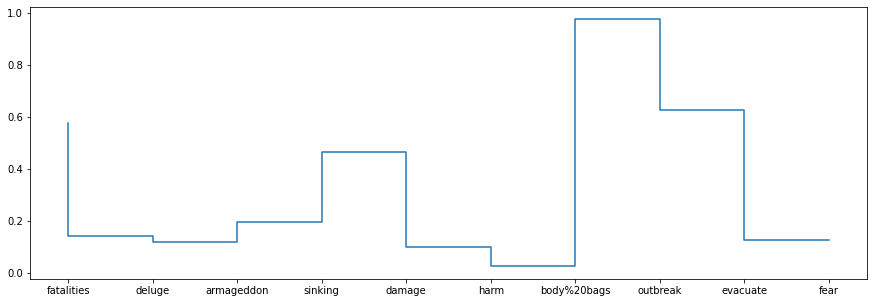

In [ ]:
b = dict(data['keyword'].value_counts().head(10))
keywords = list(b.keys())
mean_values = []
for i in keywords:
  a = no_nan_data[data['keyword'] == i]['target'].mean()
  mean_values.append(a)
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()
ax.step(keywords, mean_values)
plt.show()

# построив ступенчатую диаграмму, можно увидеть, что среди наиболее часто встречаемых ключевых слов только body%20bags, outbreak, evacuate,
# fatalities, sinking и damage указывают, что переменная target скорее всего примет значение 1
# кроме того, по графику можем сделать вывод, что частота ключевого слова особо не влияет на целевую переменную

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [ ]:
no_nan_data['str'] = no_nan_data[['keyword', 'location', 'text']].apply(lambda x: ' '.join(x), axis=1)

In [ ]:
del no_nan_data['keyword'], no_nan_data['id'], no_nan_data['location'], no_nan_data['text']

In [ ]:
no_nan_data

,target,str
0,1,Our Deeds are the Reason of this #earthquake...
1,1,Forest fire near La Ronge Sask. Canada
2,1,All residents asked to 'shelter in place' ar...
3,1,"13,000 people receive #wildfires evacuation ..."
4,1,Just got sent this photo from Ruby #Alaska a...
...,...,...
7608,1,Two giant cranes holding a bridge collapse i...
7609,1,@aria_ahrary @TheTawniest The out of control...
7610,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. h...
7611,1,Police investigating after an e-bike collide...


In [ ]:
# разобьем на тренировочную и тестовые выборки новый датасет из 2-х колонок, очищенный от индексов и с объединенными строками
from sklearn.model_selection import train_test_split

train1, test1 = train_test_split(no_nan_data, test_size=0.3, random_state=42)

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [ ]:
#сформируем тренировочные и тестовые выборки
# поскольку токенайзер принимает только список строк, преобразуем выборки из списка списков в список строк
X_train = list(map(lambda x: ''.join(x), np.array(train1.drop('target', axis=1))))
y_train = train1['target']
X_test = list(map(lambda x: ''.join(x), np.array(test1.drop('target', axis=1))))
y_test = test1['target']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
vectorizer.vocabulary_
vector = vectorizer.transform(X_train)
vector.shape
# матрица получилась довольно большого размера

(5329, 18455)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [ ]:
# посмотрим на значения в полученном словаре
vectorizer.vocabulary_

{'bridge': 2948,
 '20collapse': 320,
 'ashes': 1928,
 '2015': 295,
 'australia': 2059,
 'ûªs': 18425,
 'collapse': 3914,
 'at': 1977,
 'trent': 16483,
 'among': 1628,
 'worst': 17813,
 'in': 8314,
 'history': 7773,
 'england': 5722,
 'bundled': 3085,
 'out': 11995,
 'for': 6503,
 '60': 755,
 'http': 7970,
 'co': 3861,
 't5trhjuau0': 15733,
 'hail': 7420,
 'carol': 3363,
 'stream': 15419,
 'illinois': 8249,
 'great': 7206,
 'michigan': 10594,
 'technique': 15888,
 'camp': 3261,
 'b1g': 2147,
 'thanks': 16013,
 'to': 16272,
 'bmurph1019': 2753,
 'hail_youtsey': 7421,
 'termn8r13': 15949,
 'goblue': 7088,
 'wrestleon': 17848,
 'oaskgki6qj': 11648,
 'police': 12634,
 'houston': 7933,
 'cnn': 3854,
 'tennessee': 15932,
 'movie': 10940,
 'theater': 16025,
 'shooting': 14647,
 'suspect': 15632,
 'killed': 9246,
 'by': 3150,
 'di8elzswnr': 4890,
 'rioting': 13800,
 'still': 15357,
 'couple': 4204,
 'of': 11708,
 'hours': 7925,
 'left': 9644,
 'until': 16884,
 'have': 7546,
 'be': 2383,
 'up': 

In [ ]:
# напишем функциию, которая поочереди будет возвращать нам ответы на вышеперечисленные вопросы
import string 
punctuation1 = string.punctuation
punctuation = punctuation1.replace('#', '').replace('@', '')
# избавимся от символов # и @

def info(x : dict):
  keys = list(x.keys())
  n = 0
  k = 0
  m = 0
  for i in keys:
    if any(map(str.isdigit, i)) == True:
      n += 1
    if len(set(i) & set(punctuation)) != 0:
      k += 1
    if i[0] == '@' or i[0] == '#':
      m += 1
  print(f'Words with numbers - {n} \nWords with punctuations - {k} \nWords with @ or # - {m}')
  return n , k, m
info(vectorizer.vocabulary_)

Words with numbers - 3812 
Words with punctuations - 315 
Words with @ or # - 0


(3812, 315, 0)

In [ ]:
from nltk.tokenize import TweetTokenizer
help(TweetTokenizer)

Help on class TweetTokenizer in module nltk.tokenize.casual:

class TweetTokenizer(builtins.object)
 |  TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False)
 |  
 |  Tokenizer for tweets.
 |  
 |      >>> from nltk.tokenize import TweetTokenizer
 |      >>> tknzr = TweetTokenizer()
 |      >>> s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
 |      >>> tknzr.tokenize(s0)
 |      ['This', 'is', 'a', 'cooool', '#dummysmiley', ':', ':-)', ':-P', '<3', 'and', 'some', 'arrows', '<', '>', '->', '<--']
 |  
 |  Examples using `strip_handles` and `reduce_len parameters`:
 |  
 |      >>> tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
 |      >>> s1 = '@remy: This is waaaaayyyy too much for you!!!!!!'
 |      >>> tknzr.tokenize(s1)
 |      [':', 'This', 'is', 'waaayyy', 'too', 'much', 'for', 'you', '!', '!', '!']
 |  
 |  Methods defined here:
 |  
 |  __init__(self, preserve_case=True, reduce_len=False, strip_handles=False)
 |      

## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [ ]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer
tokenizer = TweetTokenizer()

tweet_vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize)
tweet_vectorizer.fit(X_train)
tweet_vectorizer.vocabulary_
info(tweet_vectorizer.vocabulary_)

# Tweet Tokenizer лучше "ловит" слова с упоминаниями и хэштегами, а также слова со знаками препинания

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


Words with numbers - 3940 
Words with punctuations - 4474 
Words with @ or # - 3149


(3940, 4474, 3149)

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [ ]:
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
skobki = '(){}[]'
letters = [chr(i) for i in range(97, 123)]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def islatin(x : str):
  letters = [chr(i) for i in range(97, 123)]
  func = np.vectorize(lambda x: x in letters)
  return all(func(list(x)))


def issmilik(x : str):
  skobki = '(){}[]'
  func1 = np.vectorize(lambda x: x in skobki)
  func2 = np.vectorize(lambda x: x in punctuation)
  return any(func1(list(x))) and all(func2(list(x)))


def ishashtag(x : str):
  letters = [chr(i) for i in range(97, 123)]
  func = np.vectorize(lambda x: x in letters)
  if len(x) > 1:
    ans = all(func(list(x[1:])))
  else:
    ans = False
  return list(x)[0] == '#' and ans

In [ ]:
def my_tokenizer(x : str):
  lower_x = x.lower() #0

  tk = TweetTokenizer() 

  a = tk.tokenize(lower_x) #1

  for i in a:
    if islatin(i) != True and ishashtag(i) != True and issmilik(i) != True:
      a.remove(i)                                                             #2

  for i in a:
    if i in stopwords:
      a.remove(i)       #3   

  snowball = SnowballStemmer(language='english')
  a = list(map(lambda x: snowball.stem(x), a))   #4

  return a

In [ ]:
for i in X_train[:10]:
  print(my_tokenizer(i))

['bridg', '20collaps', 'ash', 'australia', 'ûªs', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', ':', 'england', 'bundl', 'australia', '...']
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '@hail_youtsey', '@termn8r13', '#goblu', '#wrestleon']
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
['riot', 'still', 'riot', 'a', 'coupl', 'hour', 'left', 'i', 'to', 'up', 'class']
['wound', 'lake', 'highland', 'crack', 'the', 'path', 'i', 'wipe', 'this', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee', 'http://t.co/yaqrsximph']
['airplan', '20accid', 'somewher', 'there', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', 'http://t.co/tagzbcxfj0', '#mlb']
['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', ':', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show'

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

my_vectorizer_train = CountVectorizer(tokenizer=my_tokenizer)
my_vectorizer_train.fit(X_train)
tr = my_vectorizer_train.transform(X_train)
ts = my_vectorizer_train.transform(X_test)

logreg = LogisticRegression()
logreg.fit(tr, y_train)

print(f'\nf1 score: {f1_score(logreg.predict(ts), y_test)}')

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1 score: 0.7456709956709956


## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vct = TfidfVectorizer(tokenizer=my_tokenizer) 
vct.fit(X_train)
tr2 = vct.transform(X_train)
ts2 = vct.transform(X_test)

logreg2 = LogisticRegression()
logreg2.fit(tr2, y_train)

print(f'\nf1-score: {f1_score(logreg2.predict(ts2), y_test)}')
print(f'Размер матрицы без max_df: {tr2.shape}')
#качество немного ухудшилось, но не значительно

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1-score: 0.7440310938367575
Размер матрицы без max_df: (5329, 12833)


In [ ]:
#теперь добавим максимальное значение df равное 0.9 и проверим качество
vct = TfidfVectorizer(tokenizer=my_tokenizer, max_df=0.9) 
vct.fit(X_train)
tr3 = vct.transform(X_train)
ts3 = vct.transform(X_test)

logreg3 = LogisticRegression()
logreg3.fit(tr3, y_train)

print(f'\nf1-score: {f1_score(logreg3.predict(ts3), y_test)}')
print(f'Размер матрицы max_df = 0.9: {tr3.shape}')
# качество не изменилось, и размер матрицы так же не поменялся, возможно, потому что нет элементов 
#  встречающихся так часто

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1-score: 0.7440310938367575
Размер матрицы max_df = 0.9: (5329, 12833)


In [ ]:
# теперь будем удалять слова с маленьким df
vct = TfidfVectorizer(tokenizer=my_tokenizer, min_df = 0.0002) 
vct.fit(X_train)
tr4 = vct.transform(X_train)
ts4 = vct.transform(X_test)

logreg4 = LogisticRegression()
logreg4.fit(tr4, y_train)

print(f'\nf1-score: {f1_score(logreg4.predict(ts4), y_test)}')
print(f'Размер матрицы : {tr4.shape}')
# при установлении df_min = 0.0002 матрица значительно уменьшилась в размерах и качество стало чуть лучше

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1-score: 0.7473625763464742
Размер матрицы : (5329, 4821)


## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

my_vectorizer_train = HashingVectorizer(tokenizer=my_tokenizer, n_features=5000)
my_vectorizer_train.fit(X_train)
tr = my_vectorizer_train.transform(X_train)
ts = my_vectorizer_train.transform(X_test)

logreg = LogisticRegression()
logreg.fit(tr, y_train)

print(f'\nf1 score: {f1_score(logreg.predict(ts), y_test)}')

# при n_features = 5000 качество ухудшилось

# самый хороший результат показала модель с TfidfVectorizer и df_min = 0.0002

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1 score: 0.7191513121161363


## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [ ]:
# несмотря на то что у нас уже получилась модель с f1-score = 0,75 (если округлить до стоых), попробуем поподбирать гиперпараметры модели с TfidfVectorizer и TfidfVectorizer
# начнем с первой 
df_min = [i for i in np.arange(0.0003, 0.0015, 0.0002)]
for i in df_min:
  vct = TfidfVectorizer(tokenizer=my_tokenizer, min_df = i, max_df = 0.1 )
  vct.fit(X_train)
  tr4 = vct.transform(X_train)
  ts4 = vct.transform(X_test)

  logreg4 = LogisticRegression()
  logreg4.fit(tr4, y_train)

  print(f'\nf1-score (df_min = {i}): {f1_score(logreg4.predict(ts4), y_test)}')
  print(f'Размер матрицы: {tr4.shape}')

  # перебрав несколько значений min_df при max_df = 0.1, которые влияют на размер матрицы, удалось немного улучшить качество и получить f1-score практически равным 0.75 (0.74986)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1-score (df_min = 0.0003): 0.7498613422074321
Размер матрицы max_df = 0.9: (5329, 4819)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1-score (df_min = 0.0005): 0.7444444444444446
Размер матрицы max_df = 0.9: (5329, 3371)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1-score (df_min = 0.0007000000000000001): 0.7461368653421633
Размер матрицы max_df = 0.9: (5329, 2645)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1-score (df_min = 0.0009): 0.7436743674367436
Размер матрицы max_df = 0.9: (5329, 2217)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1-score (df_min = 0.0011): 0.7425742574257426
Размер матрицы max_df = 0.9: (5329, 1920)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1-score (df_min = 0.0013000000000000002): 0.7423245614035087
Размер матрицы max_df = 0.9: (5329, 1684)


In [ ]:
#теперь попробуем поподбирать гипер параметры в модели с TfidfVectorizer
n_features = np.arange(100000, 1100000, 100000)

for i in n_features:
  my_vectorizer_train = HashingVectorizer(tokenizer=my_tokenizer, n_features=i)
  my_vectorizer_train.fit(X_train)
  tr = my_vectorizer_train.transform(X_train)
  ts = my_vectorizer_train.transform(X_test)

  logreg = LogisticRegression()
  logreg.fit(tr, y_train)

  print(f'\nf1 score (n_features = {i}): {f1_score(logreg.predict(ts), y_test)}')

# перебрав значения гиперпараметра разных порядков, не удается достичь такого же хорошего качества как на модели TfidfVectorizer с df_min = 0.0003 и  df_max = 0.1 
# а значит, что модель дающая нам f1-score = 0,75 (если округлить до стоых) - это именно модель TfidfVectorizer с df_min = 0.0003 и  df_max = 0.1   

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1 score (n_features = 100000): 0.7374301675977653


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1 score (n_features = 200000): 0.7388392857142856


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1 score (n_features = 300000): 0.7404921700223713


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1 score (n_features = 400000): 0.7407821229050279


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1 score (n_features = 500000): 0.7418994413407821


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1 score (n_features = 600000): 0.7414852037967614


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1 score (n_features = 700000): 0.7400782560089434


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1 score (n_features = 800000): 0.7411961989938514


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1 score (n_features = 900000): 0.7385474860335195


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"



f1 score (n_features = 1000000): 0.7418994413407821
